## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

## Setting style and color palette

In [2]:
sns.set_style("darkgrid")
sns.set_context("notebook")
sns.set_palette("tab10")

## Importing Datasets

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

## Displaying data types

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Cleaning data

Renaming column names for easier reference

In [6]:
df_train.rename(columns={"PassengerId": "id", "Survived": "survived", 
                   "Pclass": "class", "Name": "name", "Sex": "sex", 
                   "Age": "age", "SibSp": "sibling_spouse", "Parch": "parent_children", "Ticket": "ticket", 
                   "Fare": "fare", "Cabin": "cabin", "Embarked": "embarked"}, inplace=True)

df_test.rename(columns={"PassengerId": "id", "Survived": "survived", 
                   "Pclass": "class", "Name": "name", "Sex": "sex", 
                   "Age": "age", "SibSp": "sibling_spouse", "Parch": "parent_children", "Ticket": "ticket", 
                   "Fare": "fare", "Cabin": "cabin", "Embarked": "embarked"}, inplace=True)

In [7]:
df_train.head(10)

,id,survived,class,name,sex,age,sibling_spouse,parent_children,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Checking for missing values

In [8]:
df_train.isnull().sum()

id                   0
survived             0
class                0
name                 0
sex                  0
age                177
sibling_spouse       0
parent_children      0
ticket               0
fare                 0
cabin              687
embarked             2
dtype: int64

Text(0.5, 1.0, 'Missing values distribution')

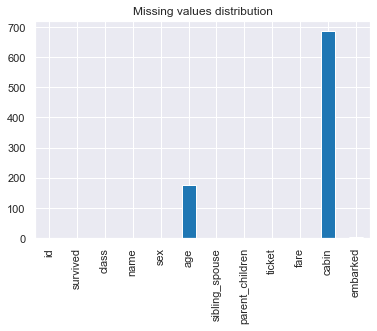

In [9]:
df_train.isnull().sum().plot(kind="bar")
plt.title("Missing values distribution")

Found missing values in columns: Age, Cabin, Embarked. 

Text(0.5, 1.0, 'Age distribution')

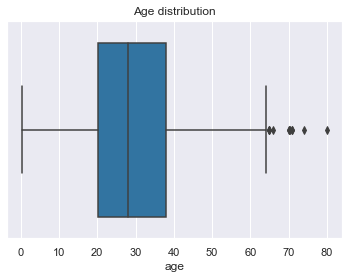

In [10]:
sns.boxplot(x=df_train["age"])
plt.title("Age distribution")

In [11]:
df_train["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

[Text(0, 0, 'S'), Text(1, 0, 'C'), Text(2, 0, 'Q')]

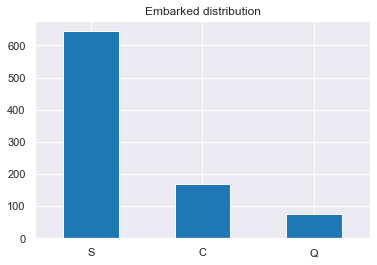

In [12]:
ax = df_train["embarked"].value_counts().plot(kind="bar")
plt.title("Embarked distribution")
ax.set_xticklabels(["S", "C", "Q"], rotation = 0)

Replacing missing values with median (age) and mode (embarked)

In [13]:
age_median = df_train["age"].median()
df_train["age"] = df_train["age"].fillna(age_median)

df_train["embarked"] = df_train["embarked"].fillna("S")

Doing the same for test set

In [14]:
df_test["age"] = df_test["age"].fillna(age_median)
df_test["embarked"] = df_test["embarked"].fillna("S")

## Feature engineering

Dropping unnecessary columns: PassengerId, Name, Ticket, Cabin

In [15]:
df_train = df_train.drop(columns=["id", "name", "ticket", "cabin"])
df_test = df_test.drop(columns=["id", "name", "ticket", "cabin"])

### 1. Class

In [16]:
df_train["class"].unique()

array([3, 1, 2], dtype=int64)

[Text(0, 0, '3rd'), Text(1, 0, '2nd'), Text(2, 0, '1st')]

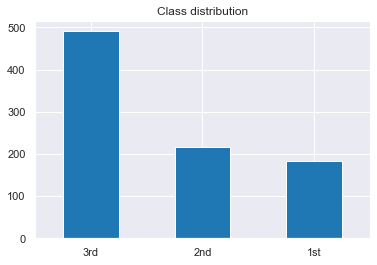

In [17]:
ax = df_train["class"].value_counts().plot(kind="bar")
plt.title("Class distribution")
ax.set_xticklabels(["3rd", "2nd", "1st"], rotation = 0)

Showing graph of survival distribution within classes:

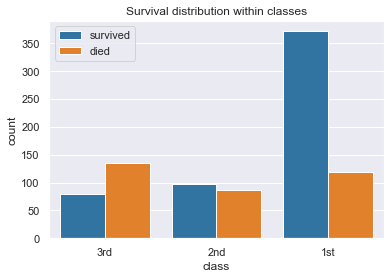

In [18]:
ax = sns.countplot(x=df_train["class"], hue=df_train["survived"])
plt.title("Survival distribution within classes")
ax.set_xticklabels(["3rd", "2nd", "1st"], rotation = 0)
plt.legend(labels=['survived', 'died'])

Counting percentage of passengers in each class who survived:

In [19]:
df_train.groupby("class").survived.value_counts(normalize=True).sort_index()

class  survived
1      0           0.370370
       1           0.629630
2      0           0.527174
       1           0.472826
3      0           0.757637
       1           0.242363
Name: survived, dtype: float64

The above graph and table show that 1st class passengers had the highest chance of survival (62.96%), whereas 3rd class passengers the lowest (24,23%).

### 2. Sex

In [20]:
df_train["sex"].unique()

array(['male', 'female'], dtype=object)

<AxesSubplot:title={'center':'Sex distribution'}, ylabel='sex'>

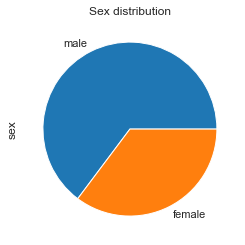

In [21]:
plt.title("Sex distribution")
df_train["sex"].value_counts().plot(kind="pie")

Showing graph of survival distribution for each sex:

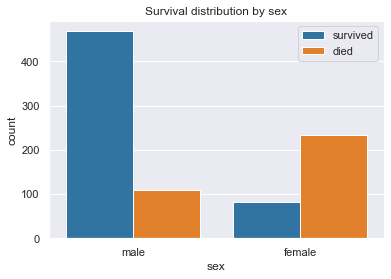

In [22]:
sns.countplot(x=df_train["sex"], hue=df_train["survived"])
plt.title("Survival distribution by sex")
plt.legend(labels=['survived', 'died'])

And the percentage...

In [23]:
df_train.groupby("sex").survived.value_counts(normalize=True).sort_index()

sex     survived
female  0           0.257962
        1           0.742038
male    0           0.811092
        1           0.188908
Name: survived, dtype: float64

We can see that generally women had higher chance of survival (74.20%) than men (18.89%).

Text(0.5, 1.0, 'Survival ratio by passenger class and sex')

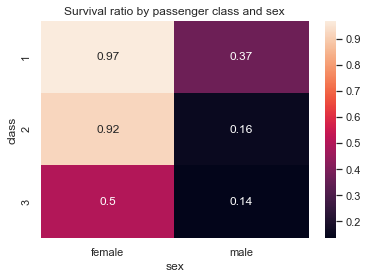

In [24]:
sns.heatmap(df_train.pivot_table(index="class", columns="sex", values="survived"), annot=True)
plt.title("Survival ratio by passenger class and sex")

From the heatmap we conclude that women in the 1st class had the highest chance of survival (97%), whereas men in the 3rd class had the lowest chance of survival (14%). Note that women in each class had higher survival ratio. Even women from 3rd class had greater chance of surviving the catastrophe than men from 1st class.

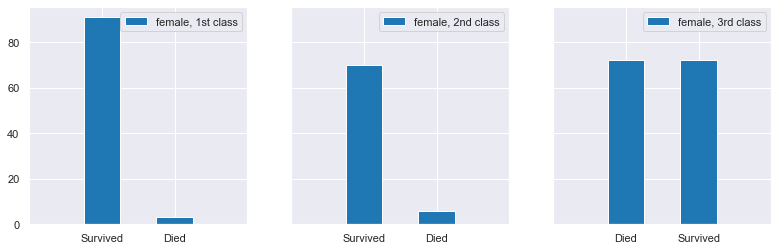

In [25]:
fig=plt.figure(figsize=(18,4))

ax1=fig.add_subplot(141)
female_1st_class = df_train["survived"][df_train["sex"] == 'female'][df_train["class"] == 1].value_counts()
female_1st_class.plot(kind='bar', label='female, 1st class')
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_1st_class))
plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_2nd_class = df_train["survived"][df_train["sex"] == 'female'][df_train["class"] == 2].value_counts()
female_2nd_class.plot(kind='bar', label='female, 2nd class')
ax2.set_xticklabels(["Survived","Died"], rotation=0)
ax2.set_xlim(-1, len(female_2nd_class))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
female_3rd_class = df_train["survived"][df_train["sex"] == 'female'][df_train["class"] == 3].value_counts()
female_3rd_class.plot(kind='bar', label='female, 3rd class')
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(female_3rd_class))
plt.legend(loc='best')

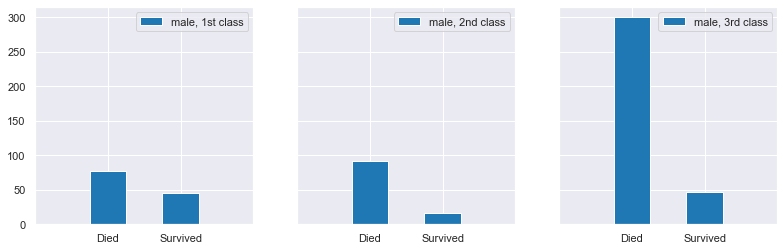

In [26]:
fig=plt.figure(figsize=(18,4))

ax1=fig.add_subplot(141)
male_1st_class = df_train["survived"][df_train["sex"] == 'male'][df_train["class"] == 1].value_counts()
male_1st_class.plot(kind='bar', label='male, 1st class')
ax1.set_xticklabels(["Died", "Survived"], rotation=0)
ax1.set_xlim(-1, len(male_1st_class))
plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
male_2nd_class = df_train["survived"][df_train["sex"] == 'male'][df_train["class"] == 2].value_counts()
male_2nd_class.plot(kind='bar', label='male, 2nd class')
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(male_2nd_class))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_3rd_class = df_train["survived"][df_train["sex"] == 'male'][df_train["class"] == 3].value_counts()
male_3rd_class.plot(kind='bar', label='male, 3rd class')
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_3rd_class))
plt.legend(loc='best')

### 3. Age

<AxesSubplot:title={'center':'Age distribution'}, ylabel='Frequency'>

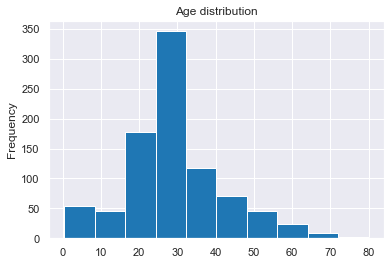

In [27]:
plt.title("Age distribution")
df_train["age"].plot(kind="hist")

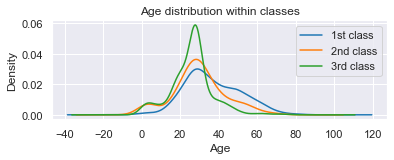

In [52]:
plt.subplot2grid((2,3),(1,0), colspan=5)
df_train["age"][df_train["class"] == 1].plot(kind='kde')    
df_train["age"][df_train["class"] == 2].plot(kind='kde')
df_train["age"][df_train["class"] == 3].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age distribution within classes")
plt.legend(('1st class', '2nd class','3rd class')) 

[Text(0, 0, '1st'), Text(1, 0, '2nd'), Text(2, 0, '3rd')]

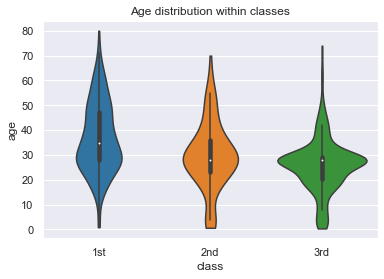

In [57]:
ax = sns.violinplot(x="class", y="age", data=df_train, cut=0)
plt.title("Age distribution within classes")
ax.set_xticklabels(["1st", "2nd", "3rd"], rotation=0)

[Text(0, 0, '1st'), Text(1, 0, '2nd'), Text(2, 0, '3rd')]

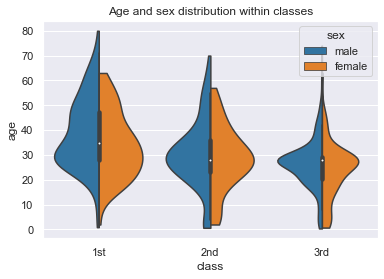

In [56]:
ax = sns.violinplot(x="class", y="age", hue="sex",
                    data=df_train, split=True, cut=0)
plt.title("Age and sex distribution within classes")
ax.set_xticklabels(["1st", "2nd", "3rd"], rotation=0)

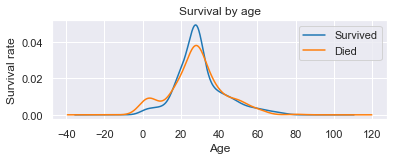

In [38]:
plt.subplot2grid((2,3),(1,0), colspan=5)
df_train["age"][df_train["survived"] == 0].plot(kind='kde')    
df_train["age"][df_train["survived"] == 1].plot(kind='kde')
plt.xlabel("Age") 
plt.ylabel("Survival rate")
plt.title("Survival by age")
plt.legend(("Survived", "Died")) 

[Text(0, 0, 'Died'), Text(1, 0, 'Survived')]

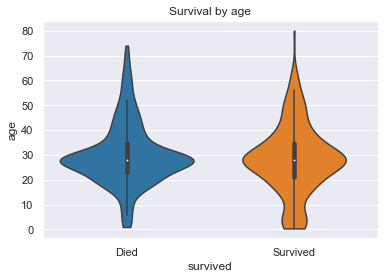

In [59]:
ax = sns.violinplot(x="survived", y="age", data=df_train, cut=0)
plt.title("Survival by age")
ax.set_xticklabels(["Died", "Survived"], rotation=0)